<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [130]:
# Isi dengan data diri Anda
NAMA = "Aiko Sulaiman"
KELAS = "C"
NPM = "2006522190"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ["https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/",
            "https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019",
            "https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/,"
            "https://stackoverflow.com/questions/46108753/what-is-meant-by-the-term-random-state-in-kmeans-function-in-package-sklear",
            "https://stats.stackexchange.com/questions/144746/k-means-for-non-spherical-non-globular-clusters",
            "https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/",
            "https://www.researchgate.net/post/Calculating_Inter_and_intra_cluster_distances_in_K_Means_clustering#:~:text=For%20intra%20cluster%20distance%20use,distance%20between%20the%20clusters%20centroids."]

In [131]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Aiko Sulaiman dari kelas C dengan NPM 2006522190, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Aiko Sulaiman)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [132]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [133]:
df = pd.read_csv('penguin.csv')

2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [134]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.info()

Jumlah data: 344
Jumlah atribut: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [135]:
#Describe numerical attribute
df.describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [136]:
#Describe categorical attribute
display(df.describe(include=object))

,pulau_habitat,jenis_kelamin
count,344,334
unique,3,3
top,Biscoe,MALE
freq,168,168


In [137]:
df.jenis_kelamin.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [138]:
#Menghapus row dengan atribut jenis_kelamin yang memiliki value = '.'
df.drop(df.loc[df.jenis_kelamin == '.'].index, inplace=True)

4. Lakukan penanganan terhadap *missing values* [2]

In [139]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total null', 'Percent'])
    print(missing_data[missing_data['Total null'] > 0])

In [140]:
cek_null(df)

                    Total null   Percent
jenis_kelamin               10  0.029155
panjang_paruh_atas           2  0.005831
tebal_paruh_atas             2  0.005831
panjang_sirip                2  0.005831
massa_tubuh                  2  0.005831


In [141]:
#Mendrop missing value
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

pulau_habitat         0
panjang_paruh_atas    0
tebal_paruh_atas      0
panjang_sirip         0
massa_tubuh           0
jenis_kelamin         0
dtype: int64

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

Text(0.5, 1.05, 'Visualisasi distribusi data dan scatterplot antar atribut dataset penguin')

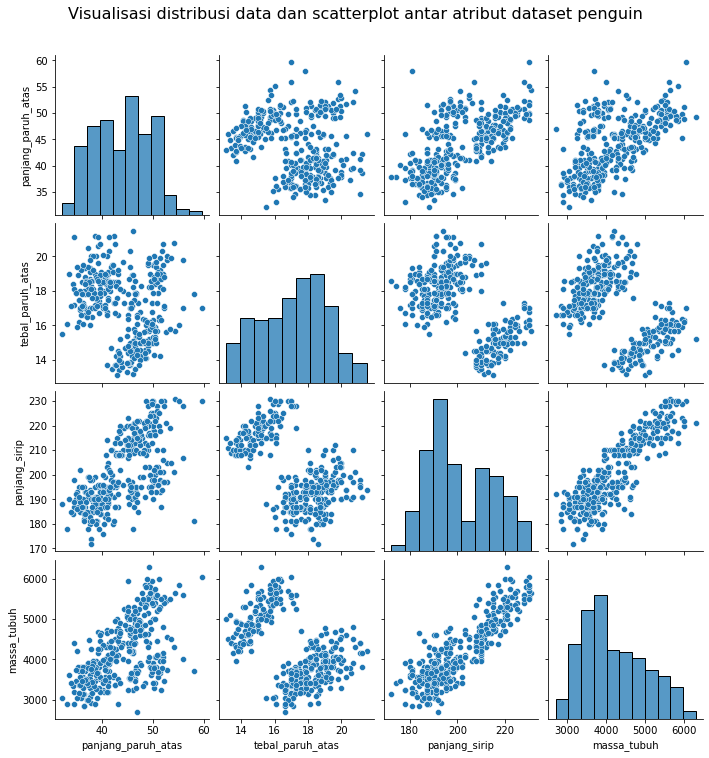

In [142]:
visualisasi = sns.pairplot(df_cleaned)
visualisasi.fig.suptitle("Visualisasi distribusi data dan scatterplot antar atribut dataset penguin", y=1.05, size = 16)

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

>Dari visualisasi distribusi data serta scatter plot di atas, saya memutuskan untuk memilih atribut tebal_paruh_atas dan massa_tubuh untuk digunakan sebagai penentuan klaster karena dari scatter plot tebal_paruh_atas dan massa_tubuh terlihat data dari kedua atribut sudah cukup terpisah. Lalu ketika akhirnya dihitung rata-rata silhouette score dari kedua atribut tersebut juga menunjukkan nilai yang cukup tinggi ketika menghitung silhouette score untuk menentukan nilai K dibanding dengan atribut-atribut lainnya

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Melakukan standardization untuk data yang ingin dilakukan clustering
x = df_cleaned[['tebal_paruh_atas','massa_tubuh']]
scaler.fit(x)
x_scaled = scaler.transform(x)

In [144]:
#Menentukan nilai K dengan silhouette score
kmax = 6
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x_scaled)
  labels = kmeans.labels_
  print("Untuk n_clusters =",k, ", Rata-rata silhouette score-nya adalah :", silhouette_score(x_scaled, labels))

Untuk n_clusters = 2 , Rata-rata silhouette score-nya adalah : 0.6191333309580637
Untuk n_clusters = 3 , Rata-rata silhouette score-nya adalah : 0.49598641965298534
Untuk n_clusters = 4 , Rata-rata silhouette score-nya adalah : 0.4667054233140721
Untuk n_clusters = 5 , Rata-rata silhouette score-nya adalah : 0.40375311386636553
Untuk n_clusters = 6 , Rata-rata silhouette score-nya adalah : 0.4056813842359121


>Dari code di atas, terlihat bahwa nilai K = 2 memiliki rata-rata silhouette score yang paling tinggi sehingga akhirnya diputuskan untuk memilih nilai K = 2

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [145]:
kmeans = KMeans(n_clusters = 2)
 
label = kmeans.fit_predict(x_scaled)

9. Visualisasikan klaster yang ada [5]

In [146]:
fig = px.scatter(x_scaled, x=x_scaled[:, 0], y=x_scaled[:, 1], color=label,
    labels={
                     "x": "Tebal paruh atas",
                     "y": "Massa tubuh",
                 },
    title="Clustering tebal paruh atas & massa tubuh dengan K-Means")

fig.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [147]:
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
model.fit(x_scaled)
labels = model.labels_

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

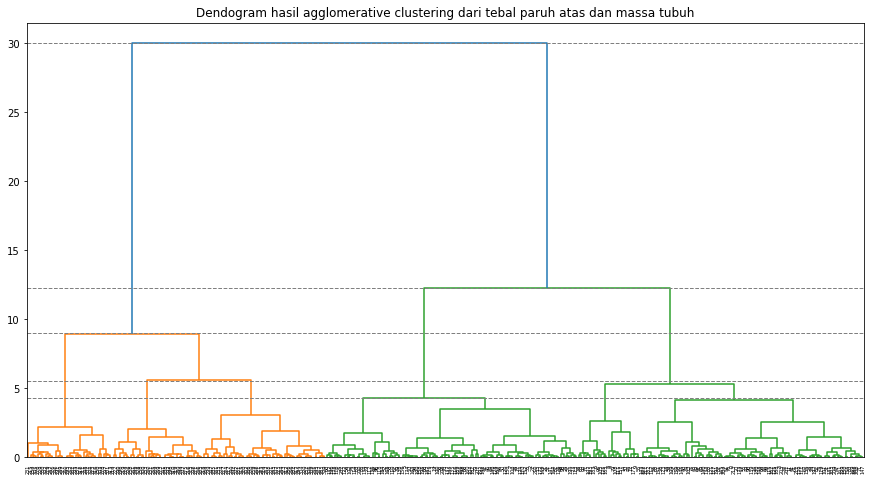

In [148]:
plt.figure(figsize=(15,8))
plt.title("Dendogram hasil agglomerative clustering dari tebal paruh atas dan massa tubuh")
dendrogram = shc.dendrogram(shc.linkage(x_scaled, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=12.3, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=9, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=5.5, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=4.3, c='grey', lw=1, linestyle='dashed')

>Dari hasil dendogram yang didapat, terlihat bahwa jumlah *cluster* yang optimal adalah 2 karena jika dilihat jarak vertikal antar node, terlihat bahwa jarak yang paling besar adalah ketika cluster = 2

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [149]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(x_scaled)
labels2 = model.labels_

14. Visualisasikan hasil *clustering assignment* [4]

In [150]:
fig = px.scatter(x_scaled, x=x_scaled[:, 0], y=x_scaled[:, 1], color=labels2,
    labels={
                     "x": "Tebal paruh atas",
                     "y": "Massa tubuh",
                 },
    title="Clustering tebal paruh atas & massa tubuh dengan Hierarchical Clustering")

fig.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]

> Jika kita ingin melakukan clustering pada dataset yang memiliki categorical dan numerical feature, dapat dilakukan encoding untuk mengubah categorical feature yang ada dapat menjadi numerical feature. Terdapat beberapa pilihan encoding yaitu pertama ada label/ordinal encoding dimana setiap kategori diubah menjadi integer value. Contohnya, pada atribut pulau_habitat setiap kategori pulau_habitat akan diubah menjadi angka 0,1,2 (berurutan). Selain label/ordinal encoding, dapat dilakukan one hot encoding untuk categorical feature yang tidak memiliki urutan karena jika dilakukan label/ordinal encoding berpotensi terjadi misleading saat clustering

16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]

>K-Means kurang cocok diterapkan pada dataset yang berstruktur non-globular karena K-Means membuat clustering berdasarkan jarak suatu data point dengan centroidnya, sementara jika dataset berstruktur non-globular, bisa saja data point yang akan dilakukan clustering diletakkan di centroid yang tidak tepat

17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]

>Method KMeans tidak selalu memberikan hasil yang sama tiap kali dijalankan karena ketika kita melakukan clustering dengan KMeans, posisi centroid awalnya dipilih secara acak sehingga method KMeans dapat mengembalikan hasil cluster yang berbeda pada *run* yang berbeda. Untuk mengatasi hasil yang berbeda setiap dijalankan, kita dapat meng-*set* random state agar ketika method KMeans dijalankan dengan random initialization dapat selalu dimulai dengan K random data points yang sama sebagai centroid

18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

> Terdapat berbagai cara untuk menghitung *Intra-cluster similarity*, salah satunya adalah dengan cara menghitung *sum* dari kuadrat jarak euclidean antara centroid dan setiap data point di dalam cluster. Sementara itu, *Inter-cluster disssimilarity* dapat dihitung dengan cara menghitung jarak antara masing-masing centroid cluster, semakin jauh jaraknya makin dissimliratynya semakin tinggi. Secara umum, suatu cluster dianggap baik jika memiliki *intra-cluster similarity* yang tinggi (*intra-cluster distance* yang rendah) dan memiliki *inter-cluster dissimilarity* yang tinggi (*intra-cluster distance yang tinggi)*